In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score

X_train_small = pd.read_csv('X_train.csv') 
X_test_scaled = pd.read_csv('X_test.csv') 
y_train_small = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Regularization hyperparameters
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

ridge_results = []

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score

model = LinearRegression()
model.fit(X_train_small, y_train_small)

y_train_pred_reg = model.predict(X_train_small)
y_test_pred_reg = model.predict(X_test_scaled)


y_train_pred = np.clip(np.round(y_train_pred_reg), 0, 15).astype(int)
y_test_pred = np.clip(np.round(y_test_pred_reg), 0, 15).astype(int)


train_accuracy = accuracy_score(y_train_small, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)


train_mse = mean_squared_error(y_train_small, y_train_pred_reg)
test_mse = mean_squared_error(y_test, y_test_pred_reg)
train_r2 = r2_score(y_train_small, y_train_pred_reg)
test_r2 = r2_score(y_test, y_test_pred_reg)


print("=== Baseline Linear Regression (No Regularization, No Transformations) ===")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

=== Baseline Linear Regression (No Regularization, No Transformations) ===
Train Accuracy: 0.2018
Test Accuracy: 0.2080
Precision: 0.2192
Recall: 0.2080
Train MSE: 5.2505
Test MSE: 5.4450
Train R²: 0.6441
Test R²: 0.6302


In [3]:
def evaluate_ridge(X_train, X_test, transformation_name):
    train_acc_list = []
    test_acc_list = []
    train_mse_list = []
    test_mse_list = []
    precision_list = []
    recall_list = []

    print(f"\n=== {transformation_name} ===")

    for alpha in alpha_values:
        model = Ridge(alpha=alpha, random_state=42)
        model.fit(X_train, y_train_small)

        y_train_pred_reg = model.predict(X_train)
        y_test_pred_reg = model.predict(X_test)

        y_train_pred = np.clip(np.round(y_train_pred_reg), 0, 15).astype(int)
        y_test_pred = np.clip(np.round(y_test_pred_reg), 0, 15).astype(int)


        train_acc = accuracy_score(y_train_small, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

        train_mse = mean_squared_error(y_train_small, y_train_pred_reg)
        test_mse = mean_squared_error(y_test, y_test_pred_reg)

        ridge_results.append({
            'Transformation': transformation_name,
            'Alpha': alpha,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision': precision,
            'Recall': recall,
            'Train MSE': train_mse,
            'Test MSE': test_mse
        })

        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
        precision_list.append(precision)
        recall_list.append(recall)

    plt.figure(figsize=(8,5))
    plt.plot(alpha_values, train_acc_list, marker='o', label='Training Accuracy')
    plt.plot(alpha_values, test_acc_list, marker='o', label='Testing Accuracy')
    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('Accuracy')
    plt.title(f'Training vs Testing Accuracy: {transformation_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8,5))
    plt.plot(alpha_values, train_mse_list, marker='o', label='Training MSE')
    plt.plot(alpha_values, test_mse_list, marker='o', label='Testing MSE')
    plt.xscale('log')
    plt.xlabel('Alpha (log scale)')
    plt.ylabel('MSE')
    plt.title(f'Training vs Testing MSE: {transformation_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Table
    prec_recall_table = pd.DataFrame({
        'Alpha': alpha_values,
        'Precision': precision_list,
        'Recall': recall_list
    })
    print(f"\nPrecision and Recall Table ({transformation_name}):")
    display(prec_recall_table)


=== No Transform ===


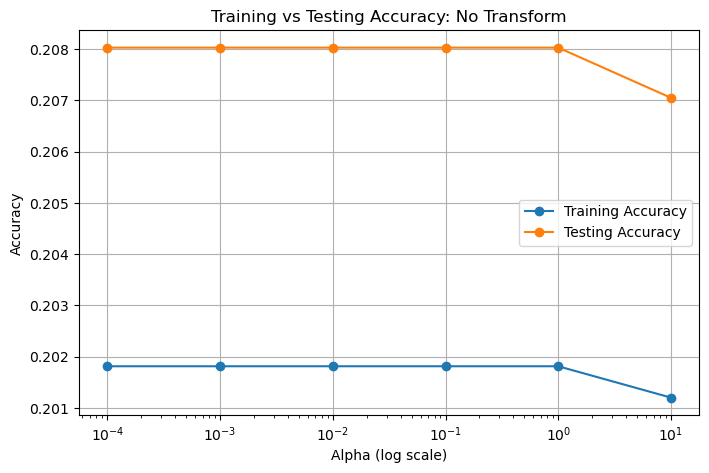

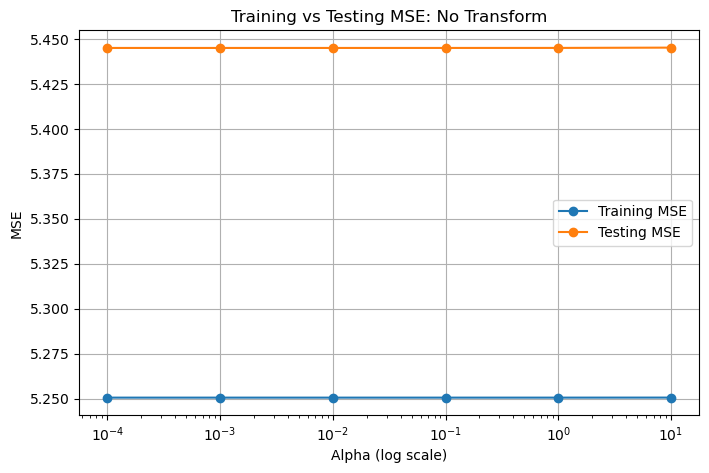


Precision and Recall Table (No Transform):


,Alpha,Precision,Recall
0,0.0001,0.219241,0.208027
1,0.0010,0.219241,0.208027
2,0.0100,0.219241,0.208027
3,0.1000,0.219241,0.208027
4,1.0000,0.219241,0.208027
5,10.0000,0.218576,0.207048


In [4]:
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
evaluate_ridge(X_train_small, X_test_scaled, 'No Transform')


=== Polynomial Degree 2 ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.51971e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.50523e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.53077e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.69135e-21): result may not be accurate.
  return linalg.s

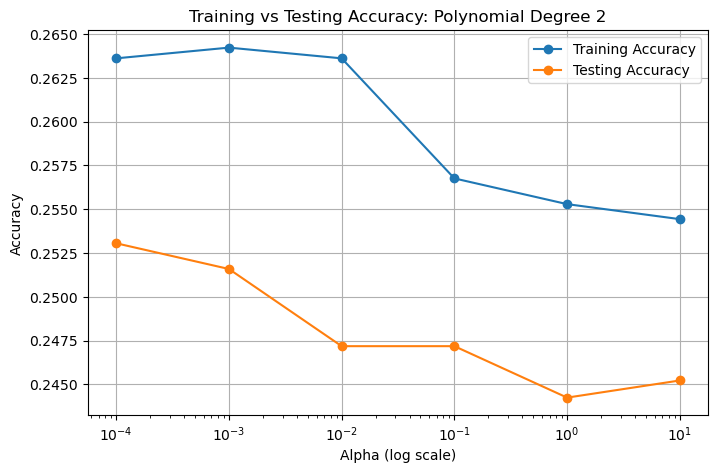

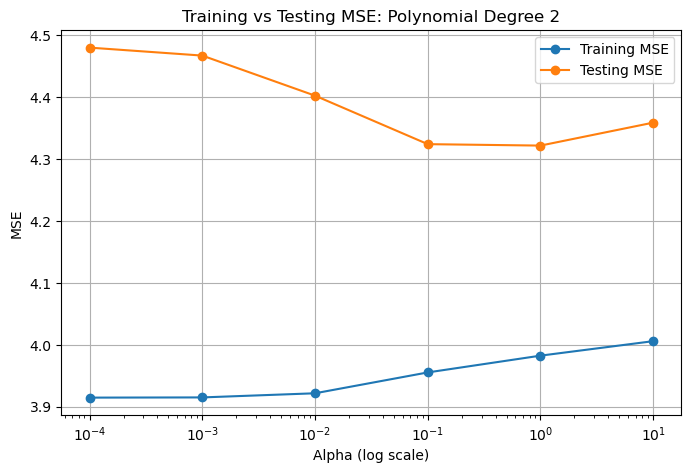


Precision and Recall Table (Polynomial Degree 2):


,Alpha,Precision,Recall
0,0.0001,0.259178,0.253059
1,0.0010,0.257836,0.251591
2,0.0100,0.253664,0.247186
3,0.1000,0.253185,0.247186
4,1.0000,0.250603,0.244249
5,10.0000,0.250742,0.245228


In [5]:
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_small)
X_test_poly2 = poly2.transform(X_test_scaled)

evaluate_ridge(X_train_poly2, X_test_poly2, 'Polynomial Degree 2')


=== Polynomial Degree 3 ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.03564e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


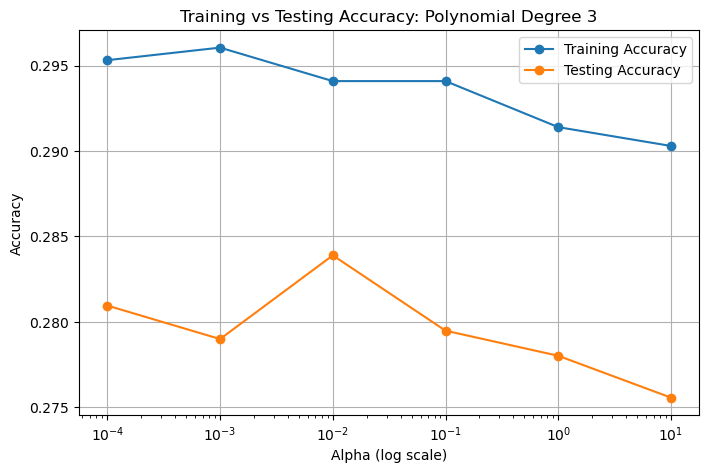

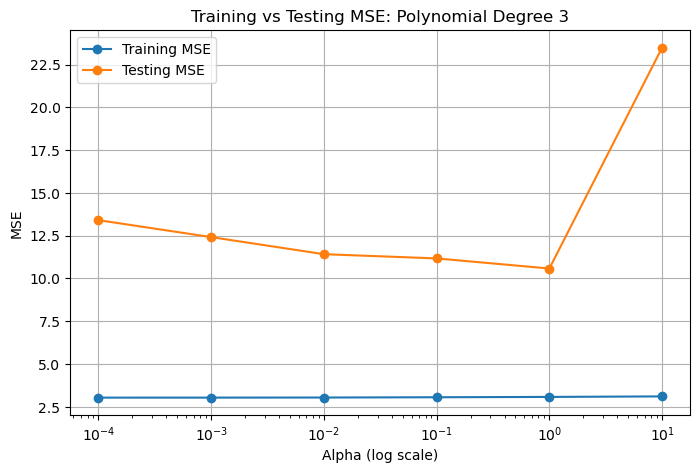


Precision and Recall Table (Polynomial Degree 3):


,Alpha,Precision,Recall
0,0.0001,0.285332,0.280959
1,0.0010,0.283414,0.279001
2,0.0100,0.288070,0.283896
3,0.1000,0.283428,0.279491
4,1.0000,0.282503,0.278023
5,10.0000,0.279382,0.275575


In [6]:
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train_small)
X_test_poly3 = poly3.transform(X_test_scaled)

evaluate_ridge(X_train_poly3, X_test_poly3, 'Polynomial Degree 3')


=== Polynomial Degree 4 ===


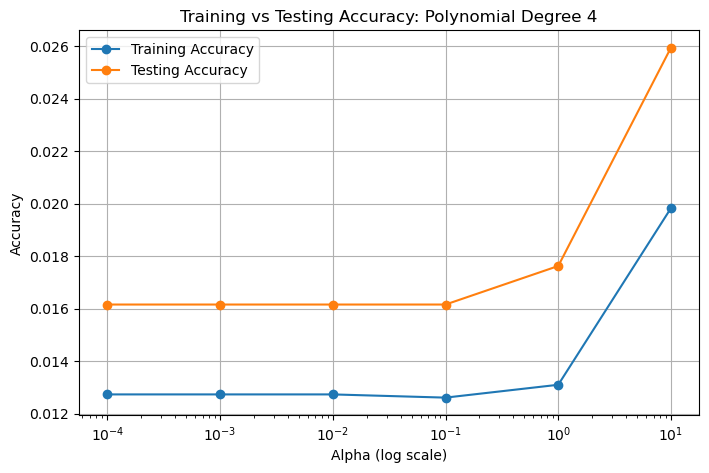

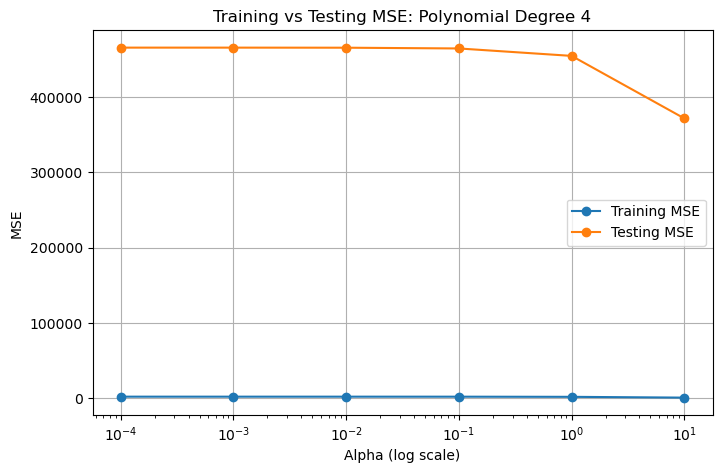


Precision and Recall Table (Polynomial Degree 4):


,Alpha,Precision,Recall
0,0.0001,0.097708,0.016153
1,0.0010,0.097708,0.016153
2,0.0100,0.097708,0.016153
3,0.1000,0.097714,0.016153
4,1.0000,0.106797,0.017621
5,10.0000,0.109112,0.025942


In [7]:
poly4 = PolynomialFeatures(degree=4)
X_train_poly4 = poly4.fit_transform(X_train_small)
X_test_poly4 = poly4.transform(X_test_scaled)

evaluate_ridge(X_train_poly4, X_test_poly4, 'Polynomial Degree 4')


=== Log Transform ===


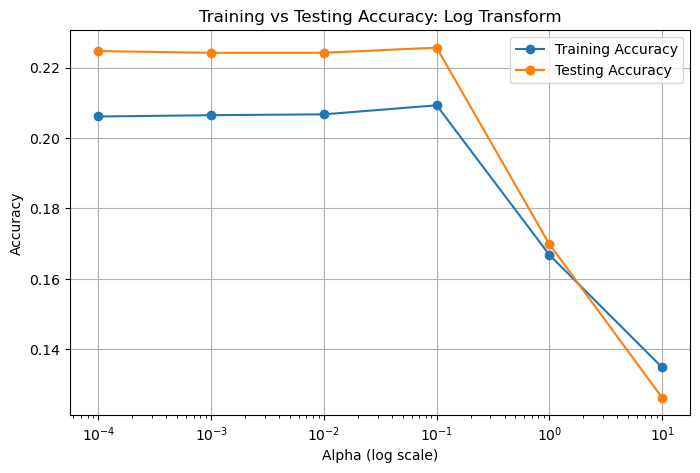

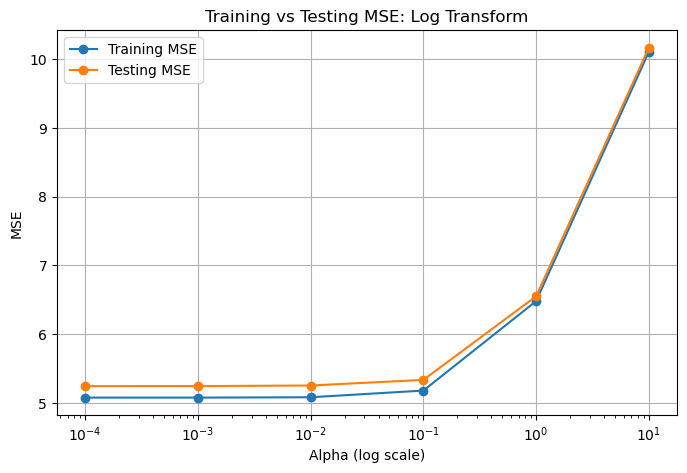


Precision and Recall Table (Log Transform):


,Alpha,Precision,Recall
0,0.0001,0.234926,0.224670
1,0.0010,0.234383,0.224180
2,0.0100,0.234983,0.224180
3,0.1000,0.237696,0.225649
4,1.0000,0.181652,0.169848
5,10.0000,0.104916,0.126285


In [8]:
X_train_log = np.log(X_train_small + 1e-5 - np.min(X_train_small))
X_test_log = np.log(X_test_scaled + 1e-5 - np.min(X_train_small))

evaluate_ridge(X_train_log, X_test_log, 'Log Transform')


=== PCA Transform 12 ===


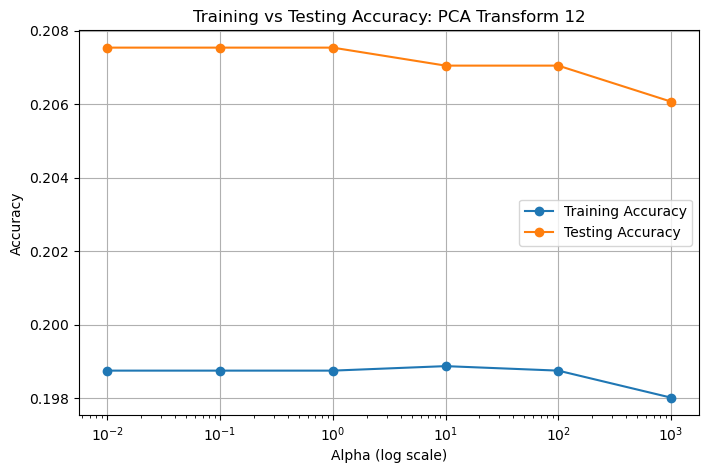

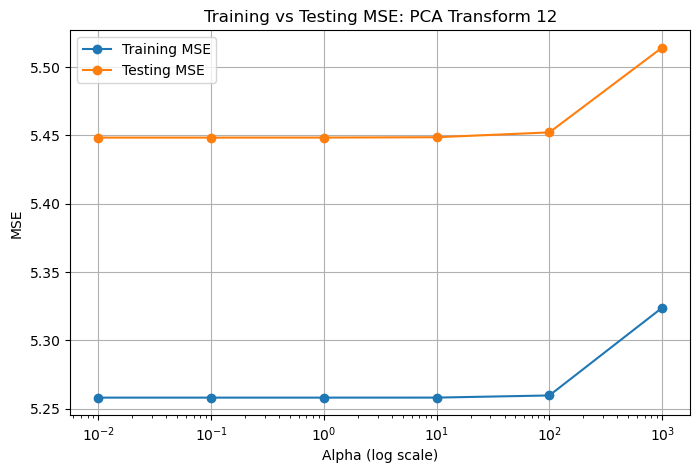


Precision and Recall Table (PCA Transform 12):


,Alpha,Precision,Recall
0,0.01,0.219425,0.207538
1,0.10,0.219425,0.207538
2,1.00,0.219425,0.207538
3,10.00,0.219041,0.207048
4,100.00,0.218982,0.207048
5,1000.00,0.213323,0.206070


In [9]:
alpha_values = [0.01, 0.1, 1, 10, 100, 1000]
pca = PCA(n_components=12)
X_train_pca = pca.fit_transform(X_train_small)
X_test_pca = pca.transform(X_test_scaled)

evaluate_ridge(X_train_pca, X_test_pca, 'PCA Transform 12')

In [10]:
ridge_results_df = pd.DataFrame(ridge_results)
from IPython.display import display
display(ridge_results_df)

ridge_results_df.to_csv('ridge_final_metrics_results.csv', index=False)
print("Saved Ridge Regression metrics to 'ridge_final_metrics_results.csv'")

,Transformation,Alpha,Train Accuracy,Test Accuracy,Precision,Recall,Train MSE,Test MSE
0,No Transform,0.0001,0.201811,0.208027,0.219241,0.208027,5.250507,5.444961
1,No Transform,0.0010,0.201811,0.208027,0.219241,0.208027,5.250507,5.444961
2,No Transform,0.0100,0.201811,0.208027,0.219241,0.208027,5.250507,5.444961
3,No Transform,0.1000,0.201811,0.208027,0.219241,0.208027,5.250507,5.444962
4,No Transform,1.0000,0.201811,0.208027,0.219241,0.208027,5.250507,5.444977
5,No Transform,10.0000,0.201199,0.207048,0.218576,0.207048,5.250529,5.445141
6,Polynomial Degree 2,0.0001,0.263615,0.253059,0.259178,0.253059,3.914629,4.480402
7,Polynomial Degree 2,0.0010,0.264227,0.251591,0.257836,0.251591,3.914959,4.467524
8,Polynomial Degree 2,0.0100,0.263615,0.247186,0.253664,0.247186,3.921648,4.402743
9,Polynomial Degree 2,0.1000,0.256762,0.247186,0.253185,0.247186,3.955360,4.324354


Saved Ridge Regression metrics to 'ridge_final_metrics_results.csv'
